
<div>
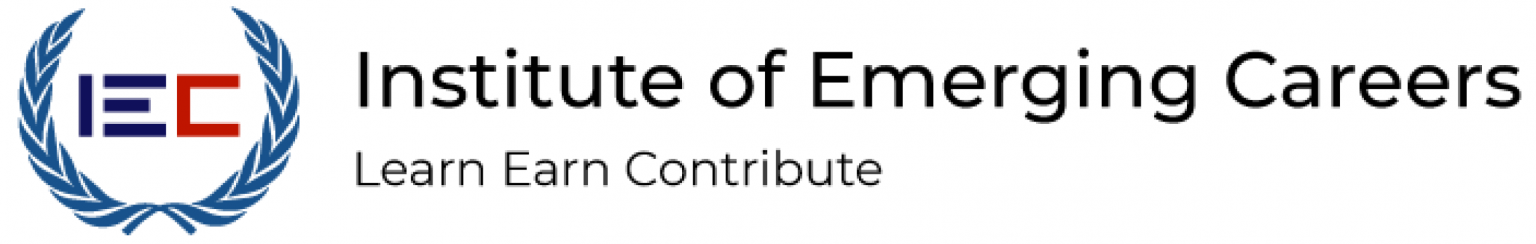
</div>

<p><b style="text-align: left">Uber & Lyft Data Analysis</b>  &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;      <b style="text-align: right">Capstone Projects-II</b></p>


***

# Business Problem
> CEO want to expand his business for this he want to know how much revenve he geting from each cape type.

### Introduction 

Uber is an international company located in 69 countries and around 900 cities around the world. Lyft, on the other hand, operates in approximately 644 cities in the US and 12 cities in Canada alone. However, in the US, it is the second-largest passenger company with a market share of 31%.

From booking a taxi to paying a bill, both services have similar features. But there are some exceptions when the two passenger services reach the neck. The same goes for prices, especially Uber’s “surge” and “Prime Time” in Lyft. There are certain limitations that depend on where service providers are classified.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

### Import Datasets

In [2]:
capRide=pd.read_csv('./Cap_weather_data/cab_rides.csv')
weather=pd.read_csv('./Cap_weather_data/weather.csv')

## Data Dicationary

| Columns Name | Describtion |
|------|------|
| distance       | distance between source and destination   
|cab_type        | Uber or Lyft
|destination     | destination of the ride
|source          | the starting point of the ride
|price           | price estimate for the ride in USD
|surge_multiplier| the multiplier by which price was increased, default 1
|id              | unique identifier
|product_id      |uber/lyft identifier for cab-type
|name            | Visible type of the cab eg: Uber Pool, UberXL


***Weather Data***
******
| Columns Name | Describtion |
| :- | :-: |
| temp | Temperature in F
| location | Location name
| clouds   | Clouds
|pressure  | pressure in mb
|rain |  rain in inches for the last hr
|time_stamp | epoch time when row data was collected
|humidity   | humidity in %
|wind       |wind speed in mph

###  Data Exploration

#### Cap Ride Data Exploration

In [3]:
# Inspect the first 5 rows of the Cap dataset
capRide.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
#Inspact shape of Cap Data
capRide.shape

(693071, 10)

In [5]:
# We can able to see percentiles,mean,std,max,count of the given dataset by using the describe() function.
capRide.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [6]:
# Inspect the summary of the dataframe
capRide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [7]:
#inspacting cap rides columns
capRide.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [8]:
#Inspacting Missing Values
(capRide.isnull().sum())/len(capRide)*100

distance            0.000000
cab_type            0.000000
time_stamp          0.000000
destination         0.000000
source              0.000000
price               7.949402
surge_multiplier    0.000000
id                  0.000000
product_id          0.000000
name                0.000000
dtype: float64

#### Data cleaning

In [9]:
#the null values is 7% so if we drop it it dont impact in data.
capRide.dropna(inplace=True)

In [10]:
#Inspacting Missing Values.
(capRide.isnull().sum())/len(capRide)*100

distance            0.0
cab_type            0.0
time_stamp          0.0
destination         0.0
source              0.0
price               0.0
surge_multiplier    0.0
id                  0.0
product_id          0.0
name                0.0
dtype: float64

In [11]:
#Inspacting Duplicates value.
capRide.duplicated().sum()

0

We have our timestamp in Unix so With the help of the **fromtimestamp()** function, we can convert Unix time to a datetime object in Python. 

In [12]:
#converting Unix into 10 digit format.
capRide["rounded_timestamp"] = capRide["time_stamp"] / 1000
#applying floor function to get floor value
capRide["rounded_timestamp"] = capRide["rounded_timestamp"].apply(np.floor)

#etrating date time values 
capRide["date"] = capRide["rounded_timestamp"].apply(lambda x : datetime.fromtimestamp(x).date())
capRide["time"] = capRide["rounded_timestamp"].apply(lambda x: datetime.fromtimestamp(x).time())
capRide['weekday'] = capRide['date'].apply(lambda x: x.weekday())
capRide["weekday"] = capRide["weekday"].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
capRide['hour'] = capRide['time'].apply(lambda time: time.hour)

#making anothoer col on basis of some condition
capRide.loc[(capRide.hour >= 6) & (capRide.hour < 12) , 'time_of_day'] = 'Morning'
capRide.loc[(capRide.hour >= 12) & (capRide.hour < 15) , 'time_of_day'] = 'Afternoon'
capRide.loc[(capRide.hour >= 15) & (capRide.hour < 18) , 'time_of_day'] = 'Evening'
capRide.loc[(capRide.hour >= 18) | (capRide.hour < 6) , 'time_of_day'] = 'Night'

capRide = capRide[['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'name', 'date', 'time', 'weekday', 'hour', 'time_of_day']]

In [13]:
capRide.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,date,time,weekday,hour,time_of_day
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16,14:30:07,Sunday,14,Afternoon
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27,07:00:23,Tuesday,7,Morning
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft,2018-11-28,06:00:22,Wednesday,6,Morning
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30,09:53:02,Friday,9,Morning
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29,08:49:20,Thursday,8,Morning


In [14]:
capRide["source"].value_counts()

Financial District         54197
Back Bay                   53201
Theatre District           53201
Boston University          53172
North End                  53171
Fenway                     53166
Northeastern University    53164
South Station              53160
Haymarket Square           53147
West End                   52980
Beacon Hill                52841
North Station              52576
Name: source, dtype: int64

In [15]:

capRide["destination"].value_counts()

Financial District         54192
Back Bay                   53190
Theatre District           53189
Haymarket Square           53171
Boston University          53171
Fenway                     53166
Northeastern University    53165
North End                  53164
South Station              53159
West End                   52992
Beacon Hill                52840
North Station              52577
Name: destination, dtype: int64

In [16]:
capRide['distance'].min()

0.02

## Adding Fare Columns 

In [17]:
capRide['fare']= capRide.surge_multiplier *capRide.price

In [18]:
capRide.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,date,time,weekday,hour,time_of_day,fare
693065,1.0,Uber,1543708385534,North End,West End,9.5,1.0,WAV,2018-12-02,04:53:05,Sunday,4,Night,9.5
693066,1.0,Uber,1543708385534,North End,West End,13.0,1.0,UberXL,2018-12-02,04:53:05,Sunday,4,Night,13.0
693067,1.0,Uber,1543708385534,North End,West End,9.5,1.0,UberX,2018-12-02,04:53:05,Sunday,4,Night,9.5
693069,1.0,Uber,1543708385534,North End,West End,27.0,1.0,Black SUV,2018-12-02,04:53:05,Sunday,4,Night,27.0
693070,1.0,Uber,1543708385534,North End,West End,10.0,1.0,UberPool,2018-12-02,04:53:05,Sunday,4,Night,10.0


## Total Revenue 

In [19]:
capRide.fare.sum()

10850929.979999999

## Revenue By Each Cabs Type

In [20]:

capRide.groupby('cab_type').sum()

,distance,time_stamp,price,surge_multiplier,hour,fare
cab_type,,,,,,
Lyft,672293.79,474651800822411968,5333957.98,317020.75,3578095,5629494.98
Uber,724402.25,510412263855830656,5221435.00,330568.00,3855479,5221435.00


## Revenue Of each Cab type With W.r.t Day time

In [21]:
res=capRide.groupby(['time_of_day','cab_type'])['fare'].sum()
res

time_of_day  cab_type
Afternoon    Lyft         632767.625
             Uber         588866.000
Evening      Lyft         739988.625
             Uber         684428.500
Morning      Lyft        1335693.525
             Uber        1255961.500
Night        Lyft        2921045.205
             Uber        2692179.000
Name: fare, dtype: float64

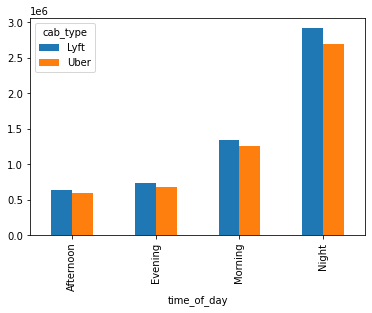

In [22]:
# plot the result
res.unstack().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

## Per Hour revenue

In [23]:
r=pd.DataFrame(capRide.groupby(['cab_type','hour'])['fare'].sum())
r

fare
cab_type hour            
Lyft     0     227312.430
         1     215978.000
         2     228493.100
         3     244287.625
         4     255007.625
         5     269781.000
         6     231863.750
         7     229863.975
         8     223741.875
         9     228803.500
         10    203947.175
         11    217473.250
         12    200562.625
         13    196164.125
         14    236040.875
         15    242088.500
         16    248771.625
         17    249128.500
         18    250058.450
         19    244024.125
         20    244715.500
         21    243598.350
         22    253815.375
         23    243973.625
Uber     0     203966.500
         1     204957.000
         2     207900.000
         3     218534.000
         4     242051.000
         5     239356.000
         6     215164.000
         7     218564.500
         8     210143.500
         9     216016.000
         10    186926.000
         11    209147.500
         12    187262.000
         13    184656.500
         14    216947.500
         15    230031.500
         16    228729.500
         17    225667.500
         18    228681.500
         19    231967.000
         20    228296.500
         21    230171.500
         22    225572.000
         23    230726.000

In [24]:
#capRide.to_csv("cab_ride_update.csv")

In [25]:
#capRide['time_stamp']= pd.to_datetime(capRide['time_stamp'])


In [26]:
# capRide['year']=pd.DatetimeIndex(capRide['time_stamp']).year
# capRide['month']=pd.DatetimeIndex(capRide['time_stamp']).month
# capRide['day']=pd.DatetimeIndex(capRide['time_stamp']).day

In [27]:
#capRide['hour']=pd.DatetimeIndex(capRide['time_stamp']).hour

#### Weather Data Exploration

In [28]:
# Inspect the first 5 rows of the Weather dataset.
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [29]:
#Inspact shape of weather Data.
weather.shape

(6276, 8)

In [30]:
# We can able to see percentiles,mean,std,max,count of the given dataset by using the describe() function.
weather.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [31]:
# Inspect the summary of the dataframe
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [32]:
#inspacting weather columns
weather.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [33]:
#Inspacting Missing Values
(weather.isnull().sum())/len(weather)*100

temp           0.000000
location       0.000000
clouds         0.000000
pressure       0.000000
rain          85.755258
time_stamp     0.000000
humidity       0.000000
wind           0.000000
dtype: float64

In [34]:
#Inspacting Duplicates value
weather.duplicated().sum()

0

In [35]:
# #converting data type to date time
# weather['time_stamp']=pd.to_datetime(weather['time_stamp'])

In [36]:
# #extracting year month day from time stamp
# weather['year']=pd.DatetimeIndex(weather['time_stamp']).year
# weather['month']=pd.DatetimeIndex(weather['time_stamp']).month
# weather['day']=pd.DatetimeIndex(weather['time_stamp']).day

In [37]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [38]:
weather['location'].value_counts()

Back Bay                   523
Beacon Hill                523
Boston University          523
Fenway                     523
Financial District         523
Haymarket Square           523
North End                  523
North Station              523
Northeastern University    523
South Station              523
Theatre District           523
West End                   523
Name: location, dtype: int64

In [39]:
#etrating date time values 
weather["date"] = weather["time_stamp"].apply(lambda x : datetime.fromtimestamp(x).date())

In [40]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,2018-12-17
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,2018-12-17
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,2018-12-17
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,2018-12-17
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,2018-12-17


In [41]:
#pd.merge(capRide,weather, on='date')

#### Cleaning data

In [42]:
# filling Nullvalues of rain with zero means no rain

weather.fillna(value=0,inplace=True)

In [43]:
#Inspacting Missing Values
(weather.isnull().sum())/len(weather)*100

temp          0.0
location      0.0
clouds        0.0
pressure      0.0
rain          0.0
time_stamp    0.0
humidity      0.0
wind          0.0
date          0.0
dtype: float64

## Expolatory Data Analysis

In [44]:
capRide.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'name', 'date', 'time', 'weekday', 'hour',
       'time_of_day', 'fare'],
      dtype='object')

### Q1 : Total Number of Uber and Lyft cabs

In [45]:
capRide["cab_type"].value_counts()

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

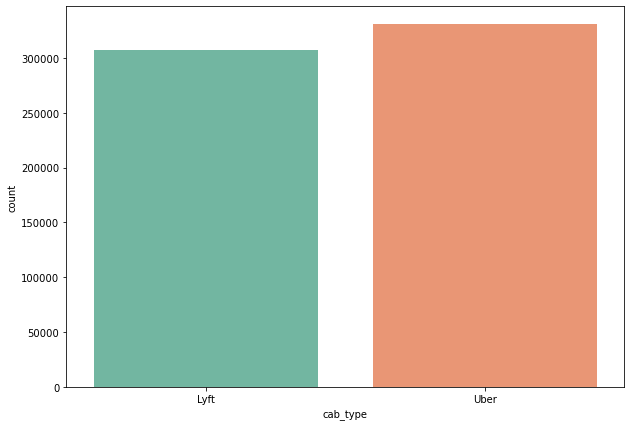

In [46]:
plt.figure(figsize=(10,7))

swarm_plot = sns.countplot(x ='cab_type', data = capRide, palette = "Set2")
fig = swarm_plot.get_figure()
#fig.savefig("out.png")

### Q2 : how many types of cab and their count?

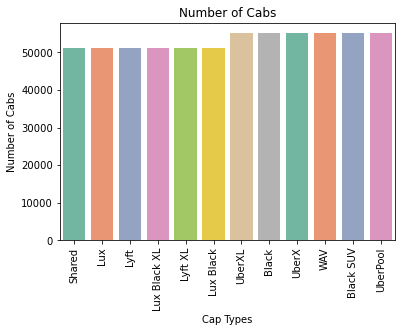

In [47]:
# count plot on single categorical variable
sns.countplot(x ='name', data = capRide, palette = "Set2")

#labels
plt.title("Number of Cabs")
plt.xlabel('Cap Types') 
plt.xticks(rotation =90)
plt.ylabel('Number of Cabs')

# Show the plot
plt.show()

### Q3: Per houer revenue 

In [48]:
c=capRide.groupby('hour').sum()

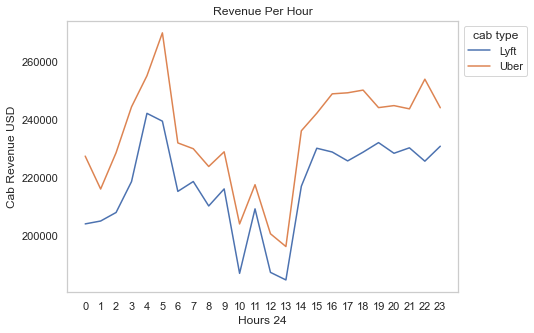

In [75]:
hours=[hour for hour , uber in uber.groupby('hour')]
c=uber.groupby('hour').sum()

lhours=[hour for hour , lyft in lyft.groupby('hour')]
d=lyft.groupby('hour').sum()

plt.figure(figsize=(7,5))

plt.plot(hours,c['fare'])
plt.plot(lhours,d['fare'])
plt.xticks(hours)
plt.title('Revenue Per Hour')
plt.xlabel('Hours 24')
plt.ylabel('Cab Revenue USD')
plt.legend(title='cab type', loc='upper left', labels=['Lyft','Uber'],bbox_to_anchor=(1,1))
plt.grid()
plt.show()

#plt.savefig('revenueperhour.jpg')

#### The revenue genrated per hour of uber is higher than lyft. 

###  Q4 : Revenue in differnt time of Day?

In [52]:
capRide.groupby(['cab_type','time_of_day'])['price'].sum()

cab_type  time_of_day
Lyft      Afternoon       600595.50
          Evening         700866.00
          Morning        1265550.65
          Night          2766945.83
Uber      Afternoon       588866.00
          Evening         684428.50
          Morning        1255961.50
          Night          2692179.00
Name: price, dtype: float64

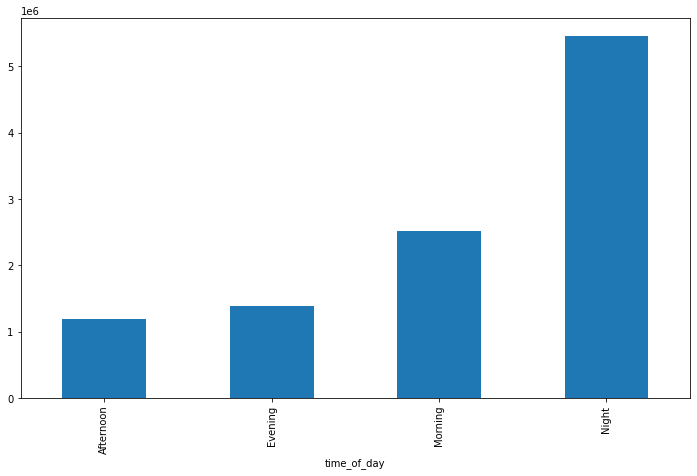

In [53]:
plt.figure(figsize=(12,7))
capRide.groupby(['time_of_day'])['price'].sum().plot(kind="bar")
plt.show()



###  Q5 : Fare Differance of each car type?

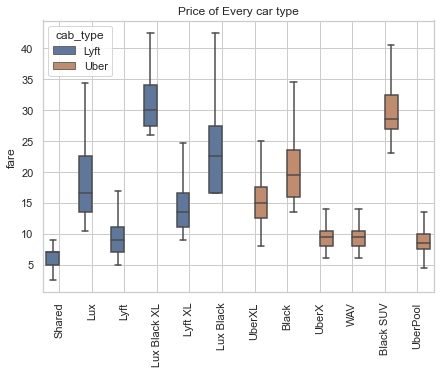

In [54]:
 # Some boilerplate to initialise things
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))

# This is where the actual plot gets made
ax = sns.boxplot(data=capRide, x="name", y="fare", saturation=0.6, showfliers=False, hue='cab_type')

# Customise some display properties
ax.set_title('Price of Every car type')
ax.grid(color='#cccccc')
ax.set_ylabel('fare')
ax.set_xlabel(None)
ax.set_xticklabels(capRide["name"].unique().astype(str), rotation='vertical')

# Ask Matplotlib to show it
plt.show()

In [55]:
# check the values of 
# each row for each column
capRide.nunique(axis=0)


distance               549
cab_type                 2
time_stamp          113945
destination             12
source                  12
price                  147
surge_multiplier         7
name                    12
date                    17
time                 11510
weekday                  7
hour                    24
time_of_day              4
fare                   233
dtype: int64

<AxesSubplot:>

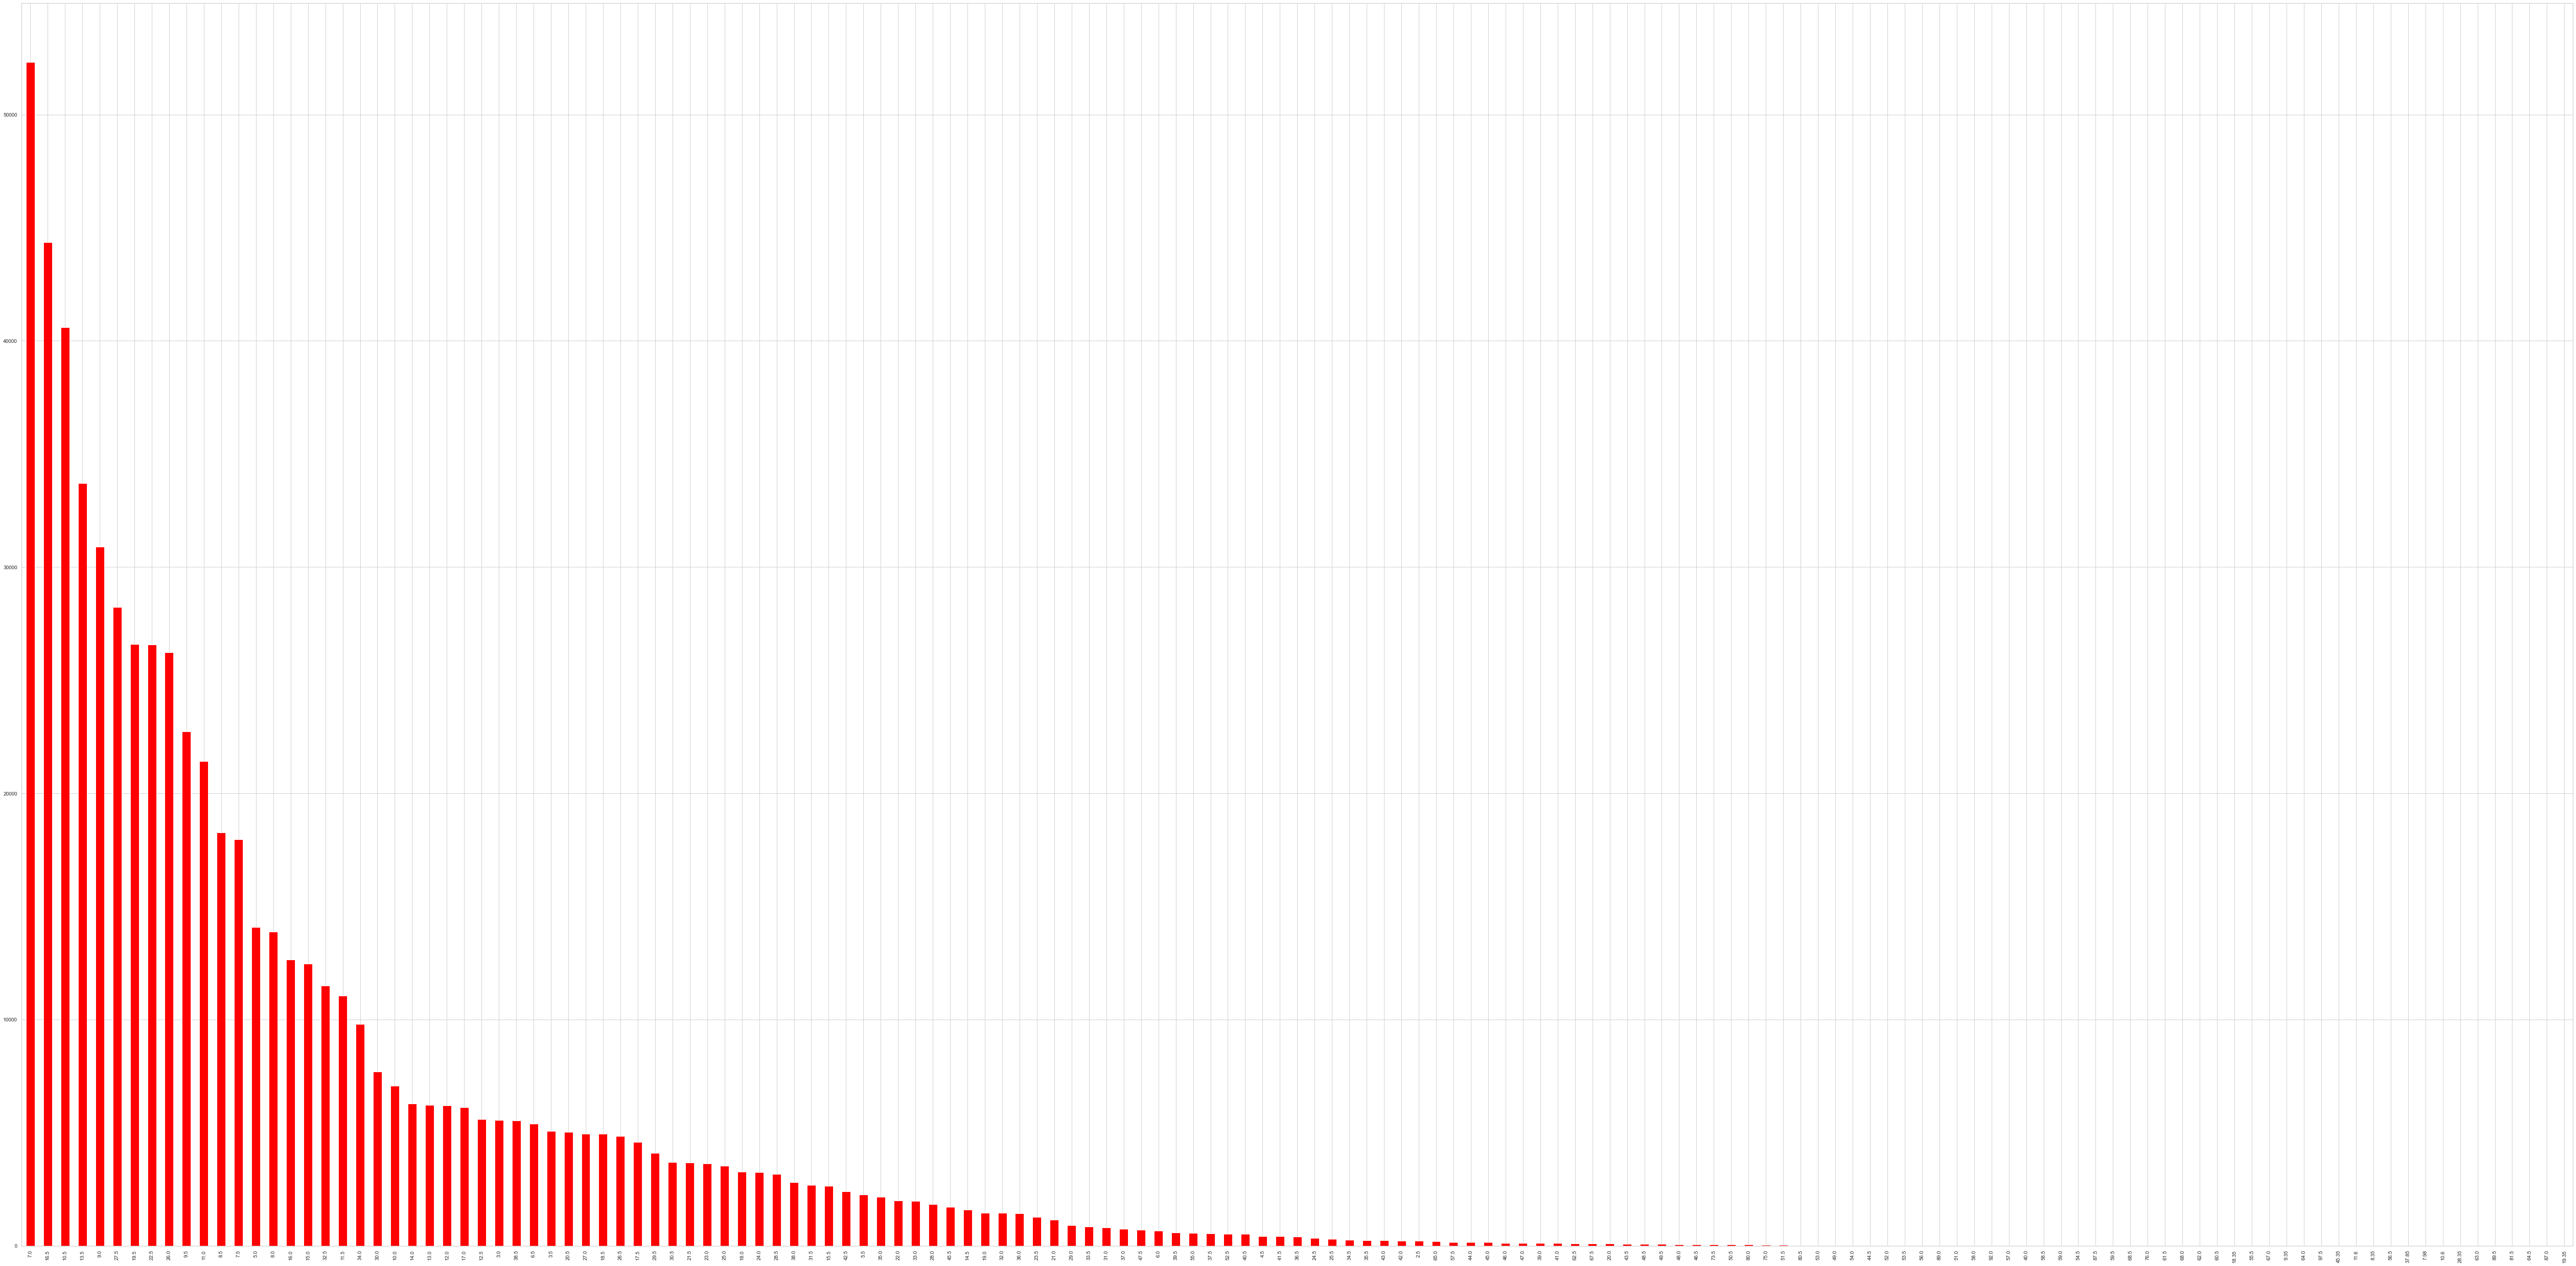

In [56]:
capRide['price'].value_counts().plot(kind='bar',figsize=(100,50),color='red')

In [57]:
a=capRide.groupby(['cab_type', 'time_of_day'])['price'].sum()
type(a)

pandas.core.series.Series

In [58]:
a=a.reset_index()

In [59]:
a.pivot(index='cab_type', columns='time_of_day', values='price')

time_of_day,Afternoon,Evening,Morning,Night
cab_type,,,,
Lyft,600595.5,700866.0,1265550.65,2766945.83
Uber,588866.0,684428.5,1255961.50,2692179.00


In [60]:
a=capRide[capRide.duplicated()][5:70]


In [61]:
pd.crosstab(capRide.source, capRide.destination, values=capRide.price, aggfunc='sum',dropna=True).round(0)

destination,Back Bay,Beacon Hill,Boston University,Fenway,Financial District,Haymarket Square,North End,North Station,Northeastern University,South Station,Theatre District,West End
source,,,,,,,,,,,,
Back Bay,NaN,NaN,121890.0,119077.0,NaN,158972.0,183319.0,NaN,116058.0,154421.0,NaN,NaN
Beacon Hill,NaN,NaN,139038.0,140388.0,NaN,121460.0,141104.0,NaN,146862.0,138850.0,NaN,NaN
Boston University,121486.0,146905.0,NaN,NaN,215866.0,NaN,NaN,176218.0,NaN,NaN,171458.0,170521.0
Fenway,120410.0,145930.0,NaN,NaN,208980.0,NaN,NaN,176726.0,NaN,NaN,155124.0,169994.0
Financial District,NaN,NaN,227956.0,208958.0,NaN,123033.0,113318.0,NaN,194374.0,117736.0,NaN,NaN
Haymarket Square,149013.0,117406.0,NaN,NaN,118786.0,NaN,NaN,109439.0,NaN,NaN,121440.0,105552.0
North End,184052.0,147680.0,NaN,NaN,115364.0,NaN,NaN,111249.0,NaN,NaN,132884.0,114490.0
North Station,NaN,NaN,165272.0,166372.0,NaN,111638.0,113687.0,NaN,173965.0,129420.0,NaN,NaN
Northeastern University,120824.0,150234.0,NaN,NaN,200394.0,NaN,NaN,177287.0,NaN,NaN,143269.0,159687.0


In [62]:
#filtering data
uber=capRide.query("cab_type == 'Uber'")
lyft=capRide.query("cab_type != 'Uber'")

In [63]:
lyft

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,date,time,weekday,hour,time_of_day,fare
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16,14:30:07,Sunday,14,Afternoon,5.0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27,07:00:23,Tuesday,7,Morning,11.0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft,2018-11-28,06:00:22,Wednesday,6,Morning,7.0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30,09:53:02,Friday,9,Morning,26.0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29,08:49:20,Thursday,8,Morning,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693042,3.11,Lyft,1543453420023,Fenway,Theatre District,16.5,1.0,Lyft XL,2018-11-29,06:03:40,Thursday,6,Morning,16.5
693043,3.11,Lyft,1543453420023,Fenway,Theatre District,22.5,1.0,Lux,2018-11-29,06:03:40,Thursday,6,Morning,22.5
693048,3.11,Lyft,1543456028123,Fenway,Theatre District,7.0,1.0,Shared,2018-11-29,06:47:08,Thursday,6,Morning,7.0
693051,3.11,Lyft,1543456028123,Fenway,Theatre District,10.5,1.0,Lyft,2018-11-29,06:47:08,Thursday,6,Morning,10.5


### Correlation Matric

<AxesSubplot:>

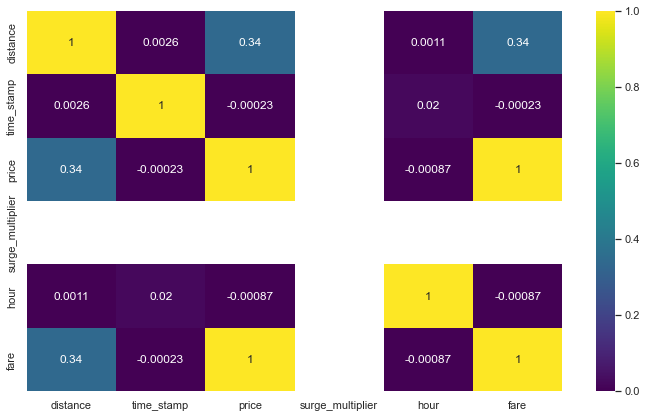

In [64]:
# Visualising correlation matrix uber
plt.figure(figsize=(12,7))
sns.heatmap(uber.corr(),annot=True,cmap="viridis")


#### in uber data only price is sliglty correlated to distance.

<AxesSubplot:>

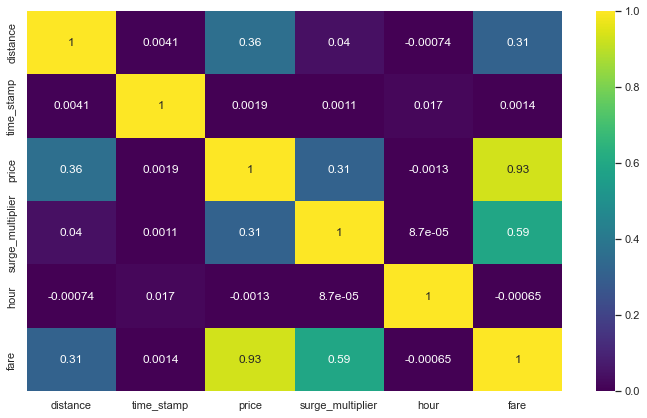

In [65]:
# Visualising correlation matrix fro lyft
plt.figure(figsize=(12,7))
sns.heatmap(lyft.corr(), annot= True, cmap='viridis')

#### in lyft price, distance and surge-multiplier correlated.

### Number of rides

C:\Users\A\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Number of rides')]

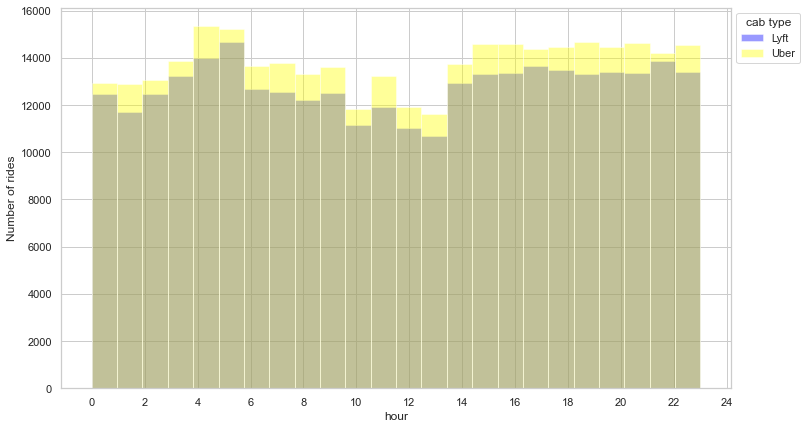

In [66]:
plt.figure(figsize=(12,7))
vis1 = sns.distplot(lyft.hour, bins=24,kde=False, color='blue')
vis2 = sns.distplot(uber.hour, bins=24,kde=False,color='yellow')

plt.xticks(range(0, 25,2))
plt.legend(title='cab type', loc='upper left', labels=['Lyft','Uber'],bbox_to_anchor=(1,1))
vis1.set(ylabel='Number of rides')


#plt.ioff()

#### not much differance in capride in uber and lyft but uber have grater number of ride.

<AxesSubplot:>

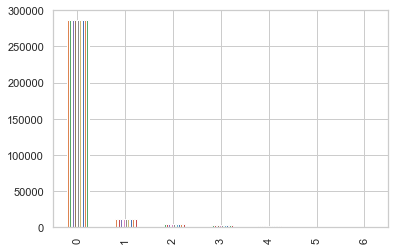

In [67]:
lyft.groupby(['surge_multiplier'],as_index=False).count().plot(kind='bar',legend=False)


In [68]:
lyft['surge_multiplier'].unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

In [69]:
#merge_data=pd.merge(capRide, weather, how='outer', on='date')

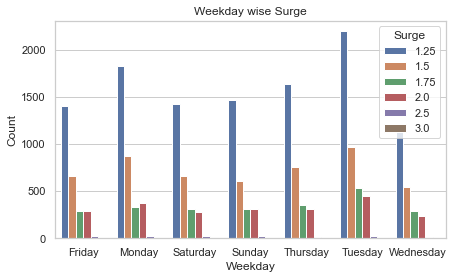

In [70]:
high_surge_dataset = lyft[lyft["surge_multiplier"]> 1]
t_high_surge = pd.DataFrame(high_surge_dataset.groupby(["weekday", "surge_multiplier"]).size().reset_index())
t_high_surge.columns = ["Weekday", "Surge", "Count"]
plt.figure(figsize=(7, 4))
sns.barplot(x="Weekday", y="Count", hue="Surge", data=t_high_surge).set_title("Weekday wise Surge");


##  Surge W.R.T Time of Day

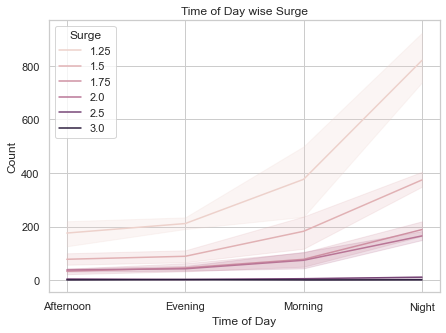

In [71]:
td_high_surge = pd.DataFrame(high_surge_dataset.groupby(["weekday", "surge_multiplier","time_of_day"]).size().reset_index())
td_high_surge.columns = ["Weekday", "Surge", "Time of Day", "Count"]

plt.figure(figsize=(7, 5))
sns.lineplot(x="Time of Day", y="Count", hue="Surge", data=td_high_surge).set_title("Time of Day wise Surge");

## Top Source and destination

In [72]:
uber_s_d_df= uber.groupby(['source', "destination"]).size().reset_index()
uber_s_d_df.columns = ["source", "destination", "count"]
uber_s_d_df.sort_values("count", inplace=True, ascending = False)
uber_five_most = uber_s_d_df.iloc[0:5, ]
uber_five_most["Source - Destination"] = uber_s_d_df["source"] + " - " + uber_s_d_df["destination"]

# So the top five most Source - Destination for Uber
uber_five_most = uber_five_most[["Source - Destination", "count"]].reset_index()
uber_five_most

C:\Users\A\AppData\Local\Temp\ipykernel_7596\1042349940.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_five_most["Source - Destination"] = uber_s_d_df["source"] + " - " + uber_s_d_df["destination"]


,index,Source - Destination,count
0,29,Financial District - South Station,4908
1,56,South Station - Financial District,4908
2,36,North End - Back Bay,4866
3,3,Back Bay - North End,4866
4,67,West End - Fenway,4830


In [73]:
lyft_s_d_df= lyft.groupby(['source', "destination"]).size().reset_index()
lyft_s_d_df.columns = ["source", "destination", "count"]
lyft_s_d_df.sort_values("count", inplace=True, ascending = False)
lyft_five_most = lyft_s_d_df.iloc[0:5, ]
lyft_five_most["Source - Destination"] = lyft_s_d_df["source"] + " - " + lyft_s_d_df["destination"]

# So the top five most Source - Destination for lyft
lyft_five_most = lyft_five_most[["Source - Destination", "count"]].reset_index()
lyft_five_most

C:\Users\A\AppData\Local\Temp\ipykernel_7596\1725472809.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyft_five_most["Source - Destination"] = lyft_s_d_df["source"] + " - " + lyft_s_d_df["destination"]


,index,Source - Destination,count
0,56,South Station - Financial District,4626
1,29,Financial District - South Station,4626
2,36,North End - Back Bay,4548
3,3,Back Bay - North End,4548
4,67,West End - Fenway,4530


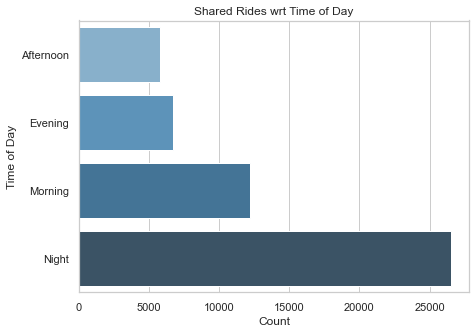

In [74]:
lyft_shared_rides_df = lyft[lyft["name"] == "Shared"]
lyft_shared_ride_td = lyft_shared_rides_df.groupby(["name", "time_of_day"]).size().reset_index()
lyft_shared_ride_td.columns = ["Name", "Time of Day", "Count"]
plt.figure(figsize=(7, 5))
sns.barplot(y="Time of Day", x="Count", data=lyft_shared_ride_td, palette="Blues_d", orient ='h' ).set_title("Shared Rides wrt Time of Day");

**Author :Maqbool Kazmi**

Copyright © 2022 Maqbool Kazmi